In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

## Dataset: cleaned_data.csv

**Hypothesis**: Can we predict future birth rate using measurements like educational attainment, population, women in labor force, women births?


In [9]:
# Read the csv file into a pandas DataFrame

cleaned_data = pd.read_csv('Resources/cleaned_data.csv')
cleaned_data = cleaned_data[cleaned_data["States"] != "United States"]
cleaned_data = shuffle(cleaned_data)
cleaned_data.head()

,Years,States,Total women with births,Birth rate,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Percent of women in labor force,Teenage pregnancy,Teenage birth Rate,Total population,Total sex ratio,Total households,Households with own children,Median household income,"Marriage Rate Per 1,000 Women"
20,2017,Maine,14100,10.6,36606,69503,98390,59720,25696,76.7,336,8,1330158,95.9,554061,130252,53024,13.5
145,2015,Pennsylvania,147562,11.5,447422,752985,898951,567528,296135,73.4,7469,18,12779559,95.6,4958859,1287103,53599,15.8
427,2009,Arizona,94426,14.9,338219,351027,509779,229385,95423,69.1,7555,36,6324865,100.4,2248170,690517,50296,19.0
83,2016,New Hampshire,14773,11.1,38838,64560,99626,67377,33709,77.3,484,11,1327503,97.8,521373,138046,68485,15.5
297,2012,New Mexico,29480,14.3,107628,107914,175573,62295,32760,68.7,3168,44,2055287,97.7,763844,219226,44886,15.4


In [19]:
cleaned_data2=cleaned_data.drop(columns='Total women with births')
cleaned_data2.head()

,Years,States,Birth rate,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Percent of women in labor force,Teenage pregnancy,Teenage birth Rate,Total population,Total sex ratio,Total households,Households with own children,Median household income,"Marriage Rate Per 1,000 Women"
20,2017,Maine,10.6,36606,69503,98390,59720,25696,76.7,336,8,1330158,95.9,554061,130252,53024,13.5
145,2015,Pennsylvania,11.5,447422,752985,898951,567528,296135,73.4,7469,18,12779559,95.6,4958859,1287103,53599,15.8
427,2009,Arizona,14.9,338219,351027,509779,229385,95423,69.1,7555,36,6324865,100.4,2248170,690517,50296,19.0
83,2016,New Hampshire,11.1,38838,64560,99626,67377,33709,77.3,484,11,1327503,97.8,521373,138046,68485,15.5
297,2012,New Mexico,14.3,107628,107914,175573,62295,32760,68.7,3168,44,2055287,97.7,763844,219226,44886,15.4


In [20]:
cleaned_data2.corr()

,Years,Birth rate,Less than high school graduate,High school graduate,Some college or associate's degree,Bachelor's degree,Graduate or professional degree,Percent of women in labor force,Teenage pregnancy,Teenage birth Rate,Total population,Total sex ratio,Total households,Households with own children,Median household income,"Marriage Rate Per 1,000 Women"
Years,1.000000,-0.344823,-0.023591,-0.042791,0.008949,0.029386,0.072712,-0.028921,-0.159626,-0.527155,0.017527,0.034357,0.014203,-0.014175,0.189373,-0.036908
Birth rate,-0.344823,1.000000,0.044300,-0.004481,0.003653,-0.037861,-0.096722,0.030186,0.155225,0.447439,-0.020543,0.460267,-0.037323,0.017089,0.067171,0.654005
Less than high school graduate,-0.023591,0.044300,1.000000,0.969403,0.984339,0.965702,0.905383,-0.280841,0.921856,0.080150,0.981550,-0.089836,0.967524,0.987265,0.054475,-0.158891
High school graduate,-0.042791,-0.004481,0.969403,1.000000,0.985007,0.967663,0.918206,-0.267683,0.910034,0.071132,0.989266,-0.165548,0.991288,0.988681,0.029574,-0.216280
Some college or associate's degree,0.008949,0.003653,0.984339,0.985007,1.000000,0.982071,0.931872,-0.246389,0.892613,0.026391,0.997313,-0.124447,0.993292,0.995201,0.060527,-0.194725
Bachelor's degree,0.029386,-0.037861,0.965702,0.967663,0.982071,1.000000,0.976941,-0.202620,0.840997,-0.061155,0.989554,-0.149725,0.985601,0.986026,0.157195,-0.233075
Graduate or professional degree,0.072712,-0.096722,0.905383,0.918206,0.931872,0.976941,1.000000,-0.165621,0.743336,-0.142502,0.948175,-0.203223,0.948253,0.937500,0.227875,-0.264245
Percent of women in labor force,-0.028921,0.030186,-0.280841,-0.267683,-0.246389,-0.202620,-0.165621,1.000000,-0.316894,-0.462588,-0.243332,0.217168,-0.227668,-0.236876,0.540001,0.121169
Teenage pregnancy,-0.159626,0.155225,0.921856,0.910034,0.892613,0.840997,0.743336,-0.316894,1.000000,0.304684,0.882856,-0.099287,0.876243,0.909279,-0.083919,-0.114083
Teenage birth Rate,-0.527155,0.447439,0.080150,0.071132,0.026391,-0.061155,-0.142502,-0.462588,0.304684,1.000000,0.006164,0.000828,0.001473,0.031920,-0.605970,0.198103


In [21]:
# Assign the data to X and y

X = cleaned_data2.drop(columns=['Years','States','Birth rate'])
y = cleaned_data2['Birth rate']
print(list(X))

['Less than high school graduate', 'High school graduate', "Some college or associate's degree", "Bachelor's degree", 'Graduate or professional degree', 'Percent of women in labor force', 'Teenage pregnancy', 'Teenage birth Rate', 'Total population', 'Total sex ratio', 'Total households', 'Households with own children ', 'Median household income', 'Marriage Rate Per 1,000 Women']


In [22]:
type(y)

pandas.core.series.Series

In [23]:
# Use train_test_split to create training and testing data

### BEGIN SOLUTION
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### END SOLUTION

In [24]:
# Create the model using LinearRegression

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
### END SOLUTION

In [25]:
# Fit the model to the training data and calculate the scores for the training and testing data

### BEGIN SOLUTION
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6800756829790167
Testing Score: 0.6781966814367175


# Quantifying our Model
R2 Score

In [26]:
from sklearn.metrics import mean_squared_error, r2_score

# Use our model to predict a value
predicted = model.predict(X)

# Score the prediction with mse and r2
mse = mean_squared_error(y, predicted)
r2 = r2_score(y, predicted)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 0.9827275811330576
R-squared (R2 ): 0.6799184873342208


Text(0.5, 1.0, 'Residual Plot')

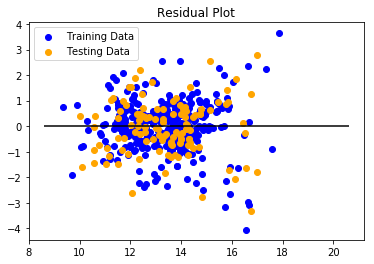

In [27]:
# Plot the Residuals for the Training and Testing data

### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION